In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Read data file
df = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Gold_Data.csv', index_col='Date')

# PREPROCESSING DATA

In [72]:
# Flip the dataset
df = df.iloc[::-1]

# Reset the index
df = df.reset_index(drop=True)

# Drop unused columns
df.drop(['Vol.', 'Change %'], axis=1, inplace = True)

# Drop missing values
df = df.dropna()

In [73]:
df

Price      Open      High       Low
0     1,282.30  1,277.90  1,292.50  1,274.20
1     1,277.70  1,277.60  1,280.50  1,273.50
2     1,264.90  1,279.10  1,279.80  1,263.20
3     1,266.10  1,268.30  1,271.80  1,264.80
4     1,253.10  1,265.20  1,266.80  1,245.80
...        ...       ...       ...       ...
1425  1,974.30  1,962.30  1,980.40  1,953.80
1426  1,981.50  1,978.00  1,982.90  1,970.30
1427  1,958.40  1,980.00  1,986.50  1,955.40
1428  1,978.60  1,956.20  1,985.70  1,955.20
1429  1,977.20  1,980.50  1,987.80  1,971.00

[1430 rows x 4 columns]

In [74]:
# Format column Price to float
# List of column names to convert
columns = ['Price', 'Open', 'High', 'Low']

# Iterate over the columns and convert them to float
for column in columns:
    df[column] = df[column].str.replace(',', '').astype(float)
df

Price    Open    High     Low
0     1282.3  1277.9  1292.5  1274.2
1     1277.7  1277.6  1280.5  1273.5
2     1264.9  1279.1  1279.8  1263.2
3     1266.1  1268.3  1271.8  1264.8
4     1253.1  1265.2  1266.8  1245.8
...      ...     ...     ...     ...
1425  1974.3  1962.3  1980.4  1953.8
1426  1981.5  1978.0  1982.9  1970.3
1427  1958.4  1980.0  1986.5  1955.4
1428  1978.6  1956.2  1985.7  1955.2
1429  1977.2  1980.5  1987.8  1971.0

[1430 rows x 4 columns]

# SPLITTING DATA(7-2-1)

In [75]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

# FIND BEST VALUE FOR K

In [45]:
# Import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 10.761302807369011
RMSE value for k=  2 is: 9.555784412295287
RMSE value for k=  3 is: 9.385460131933451
RMSE value for k=  4 is: 9.454109463706692
RMSE value for k=  5 is: 9.296061520354204
RMSE value for k=  6 is: 8.98715391594777
RMSE value for k=  7 is: 9.030663842265223
RMSE value for k=  8 is: 9.231863125379107
RMSE value for k=  9 is: 9.379739574339546
RMSE value for k=  10 is: 9.412404179993155
RMSE value for k=  11 is: 9.449972215530558
RMSE value for k=  12 is: 9.546960924724326
RMSE value for k=  13 is: 9.6374128550278
RMSE value for k=  14 is: 9.709447756253278
RMSE value for k=  15 is: 9.71938118751502
RMSE value for k=  16 is: 9.80782966447076
RMSE value for k=  17 is: 9.899998816106407
RMSE value for k=  18 is: 9.954172993279922
RMSE value for k=  19 is: 10.09219528818419
RMSE value for k=  20 is: 10.333214950164061


<Axes: >

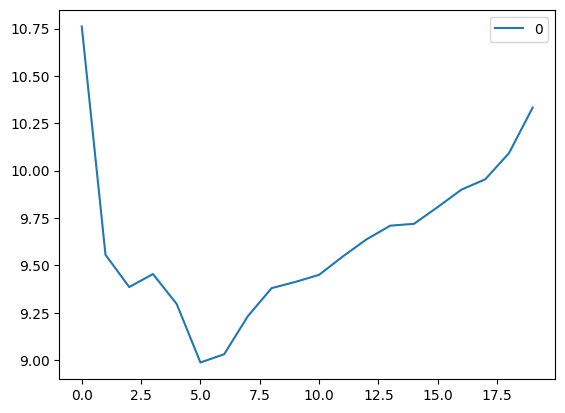

In [9]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [76]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

nn = KNeighborsRegressor(params)

model = GridSearchCV(nn, params, cv=10)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 2}

# K-NEAREST NEIGHBOR

In [77]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 6)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [78]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [49]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65
 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65
 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65
 1190.65 1190.65 1190.65]


In [50]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  8.98715391594777
Testing MAE:  7.0062937062936985
Testing MAPE:  0.3888373885140789
Validation RMSE:  9.452539627065041
Validation MAE:  7.08171296296298
Validation MAPE:  0.3669213902489062


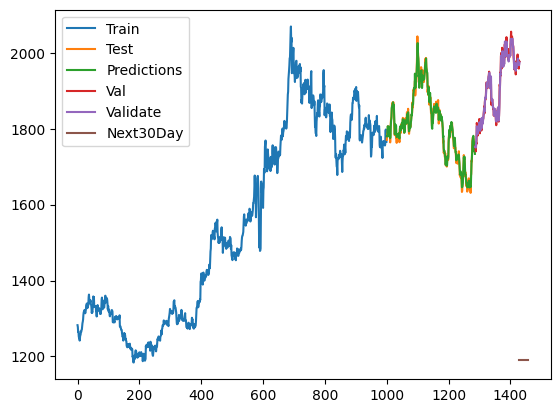

In [51]:
# Plot the model
plt.plot(train_data.index,train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [52]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.99


# SPLITTING DATA(6-3-1)

In [79]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [80]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [19]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 10.153888469396895
RMSE value for k=  2 is: 9.470419534204716
RMSE value for k=  3 is: 9.395086562408654
RMSE value for k=  4 is: 9.310057192005583
RMSE value for k=  5 is: 9.2091501699748
RMSE value for k=  6 is: 9.09010593447764
RMSE value for k=  7 is: 9.222351691909745
RMSE value for k=  8 is: 9.403116094844494
RMSE value for k=  9 is: 9.462220154264903
RMSE value for k=  10 is: 9.465370967502944
RMSE value for k=  11 is: 9.468068059945665
RMSE value for k=  12 is: 9.484423563890982
RMSE value for k=  13 is: 9.56581539879397
RMSE value for k=  14 is: 9.573193440948463
RMSE value for k=  15 is: 9.715937463391857
RMSE value for k=  16 is: 9.814945401120754
RMSE value for k=  17 is: 10.008307537416728
RMSE value for k=  18 is: 10.110980311576611
RMSE value for k=  19 is: 10.18267270078598
RMSE value for k=  20 is: 10.426735898808271


<Axes: >

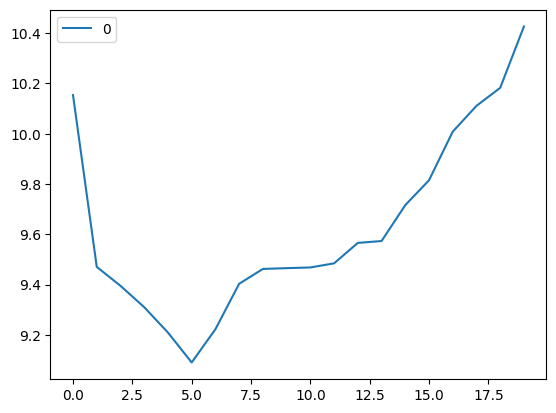

In [20]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [81]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

nn = KNeighborsRegressor(params)

model = GridSearchCV(nn, params, cv=10)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 2}

# K-NEAREST NEIGHBOR

In [56]:
# create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 14)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=14)

In [57]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [58]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1194.54285714 1194.54285714 1194.54285714 1194.54285714 1194.54285714
 1194.54285714 1194.54285714 1194.54285714 1194.54285714 1194.54285714
 1194.54285714 1194.54285714 1194.54285714 1194.54285714 1194.54285714
 1194.54285714 1194.54285714 1194.54285714 1194.54285714 1194.54285714
 1194.54285714 1194.54285714 1194.54285714 1194.54285714 1194.54285714
 1194.54285714 1194.54285714 1194.54285714 1194.54285714 1194.54285714]


In [59]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  9.573193440948463
Testing MAE:  7.389826839826857
Testing MAPE:  0.41036147354966535
Validation RMSE:  15.403106864675998
Validation MAE:  11.445504495504476
Validation MAPE:  0.5883930672416737


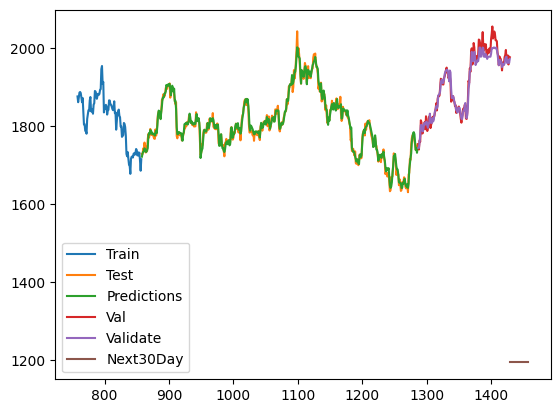

In [60]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [61]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.98


# SPLITTING DATA(5-3-2)

In [82]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [83]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [30]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 14.98283944569513
RMSE value for k=  2 is: 14.262137308484327
RMSE value for k=  3 is: 14.371427756765716
RMSE value for k=  4 is: 14.951145528767269
RMSE value for k=  5 is: 15.6990296197673
RMSE value for k=  6 is: 16.350012851001683
RMSE value for k=  7 is: 16.767610148945987
RMSE value for k=  8 is: 17.541530650630715
RMSE value for k=  9 is: 18.285834405522337
RMSE value for k=  10 is: 18.711045520641683
RMSE value for k=  11 is: 19.201075449726556
RMSE value for k=  12 is: 19.571973527461346
RMSE value for k=  13 is: 19.990276922346983
RMSE value for k=  14 is: 20.3997902646785
RMSE value for k=  15 is: 20.999526093245446
RMSE value for k=  16 is: 21.171808071204836
RMSE value for k=  17 is: 21.40675922563049
RMSE value for k=  18 is: 21.629169313860217
RMSE value for k=  19 is: 21.593847245751647
RMSE value for k=  20 is: 21.809374276947604


<Axes: >

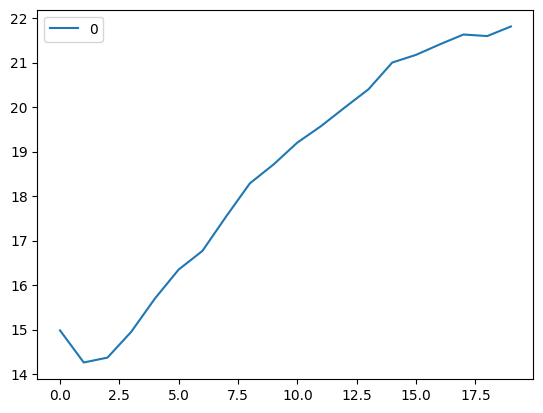

In [31]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [65]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 6)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [66]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [67]:
# Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65
 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65
 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65 1190.65
 1190.65 1190.65 1190.65]


In [68]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  16.350012851001683
Testing MAE:  12.145843045843048
Testing MAPE:  0.6565294245388708
Validation RMSE:  12.251493891118026
Validation MAE:  9.38601398601397
Validation MAPE:  0.5108131186315716


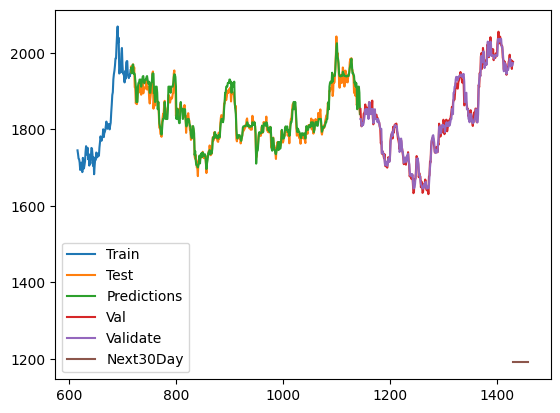

In [69]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [70]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.94


# Evaluating model

---

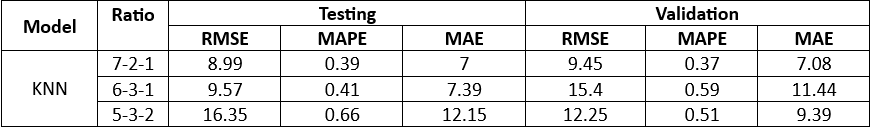